### About Aerofit

#### Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## Business Problem

#### The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

#### importing all the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aero_df = pd.read_csv('e:/All About Coding/Scaler Projects/Aerofit/aerofit_treadmill.csv')

In [4]:
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
aero_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [6]:
aero_df.shape

(180, 9)

#### there are 180 rows and 9 columns in a dataframe

In [7]:
aero_df.size

1620

In [8]:
aero_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [9]:
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### looks like there are no null values present in the dataset

In [10]:
aero_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
aero_df.duplicated().sum()

np.int64(0)

#### there are no duplicated values also

In [12]:
def check_unique_values(dataframe):
    for col in dataframe.columns:
        print(f'Total unique values in {col}: {dataframe[col].nunique()}')
        print()
        print(f'Unique values in {col} : {dataframe[col].unique()}')
        print('-' * 75)

In [13]:
check_unique_values(aero_df)

Total unique values in Product: 3

Unique values in Product : ['KP281' 'KP481' 'KP781']
---------------------------------------------------------------------------
Total unique values in Age: 32

Unique values in Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
---------------------------------------------------------------------------
Total unique values in Gender: 2

Unique values in Gender : ['Male' 'Female']
---------------------------------------------------------------------------
Total unique values in Education: 8

Unique values in Education : [14 15 12 13 16 18 20 21]
---------------------------------------------------------------------------
Total unique values in MaritalStatus: 2

Unique values in MaritalStatus : ['Single' 'Partnered']
---------------------------------------------------------------------------
Total unique values in Usage: 6

Unique values in Usage : [3 2 4 5 6 7]
---------------------------------------

#### Basic Descriptive Statistics

In [14]:
aero_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### age column has a mean value of 28 and max value of 50
#### education column has a mean value of 15 and max value of 21
#### usage column has a mean value of 3 and max value of 7
#### fitness column has a mean value of 3 and max value of 5
#### income column has a mean value of 53719 and max value of 104581
#### miles column has a mean value of 103 and max value of 360

In [15]:
aero_df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


#### Product has 3 unique value and top value is KP281
#### Gender has 2 unique value and top value is Male
#### Marital status has 2 unique value and top is Partenered

In [16]:
aero_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Data Preparation
#### Derived Columns
##### Added 2 new feature from Age: Age-Category and Age-Group


In [17]:
bins = [14,20,30,40,60]
labels = ['Teens', '20s', '30s', 'Above 40s']
aero_df['Age_Group'] = pd.cut(aero_df['Age'], bins)
aero_df['Age_Category'] = pd.cut(aero_df['Age'], bins, labels = labels)

In [18]:
aero_df.sample(15)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Age_Category
141,KP781,22,Male,16,Single,3,5,54781,120,"(20, 30]",20s
80,KP481,19,Male,14,Single,3,3,31836,64,"(14, 20]",Teens
117,KP481,31,Female,18,Single,2,1,65220,21,"(30, 40]",30s
150,KP781,25,Male,16,Partnered,4,5,49801,120,"(20, 30]",20s
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
12,KP281,22,Female,16,Single,4,3,36384,75,"(20, 30]",20s
156,KP781,25,Male,20,Partnered,4,5,74701,170,"(20, 30]",20s
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens
58,KP281,32,Male,14,Partnered,4,3,52302,85,"(30, 40]",30s
102,KP481,25,Female,14,Single,2,3,43206,64,"(20, 30]",20s


In [19]:
# Income Slab
income_bins = [29000, 35000, 60000, 85000, 105000]
income_label = ['Low income', 'Lower-middle income', 'Upper-middle income', 'High income']
aero_df['Income_Slab'] = pd.cut(aero_df['Income'], bins=income_bins, labels=income_label)
aero_df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Age_Category,Income_Slab
169,KP781,30,Male,18,Partnered,5,5,99601,150,"(20, 30]",20s,High income
145,KP781,23,Male,16,Single,4,5,48556,100,"(20, 30]",20s,Lower-middle income
108,KP481,26,Female,16,Partnered,4,3,45480,85,"(20, 30]",20s,Lower-middle income
92,KP481,23,Female,14,Single,3,2,40932,53,"(20, 30]",20s,Lower-middle income
62,KP281,34,Female,16,Single,2,2,52302,66,"(30, 40]",30s,Lower-middle income
66,KP281,36,Male,12,Single,4,3,44343,94,"(30, 40]",30s,Lower-middle income
127,KP481,34,Male,15,Single,3,3,67083,85,"(30, 40]",30s,Upper-middle income
40,KP281,26,Male,16,Single,3,3,50028,85,"(20, 30]",20s,Lower-middle income
85,KP481,21,Male,16,Partnered,2,2,34110,42,"(20, 30]",20s,Low income
138,KP481,45,Male,16,Partnered,2,2,54576,42,"(40, 60]",Above 40s,Lower-middle income


# Univariate Analysis

##### Numerical Cols   -> Age, Education, Usage, Fitness, Income, Miles
##### Categorical Cols -> Product, Gender, MaritalStatus, Age_group, Age_Category, Income_slab

In [20]:
# converting object data type column to category data type
aero_df['Product'] = aero_df['Product'].astype('category')
aero_df['Gender'] = aero_df['Gender'].astype('category')
aero_df['MaritalStatus'] = aero_df['MaritalStatus'].astype('category')

In [21]:
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Age_Group      180 non-null    category
 10  Age_Category   180 non-null    category
 11  Income_Slab    180 non-null    category
dtypes: category(6), int64(6)
memory usage: 10.6 KB


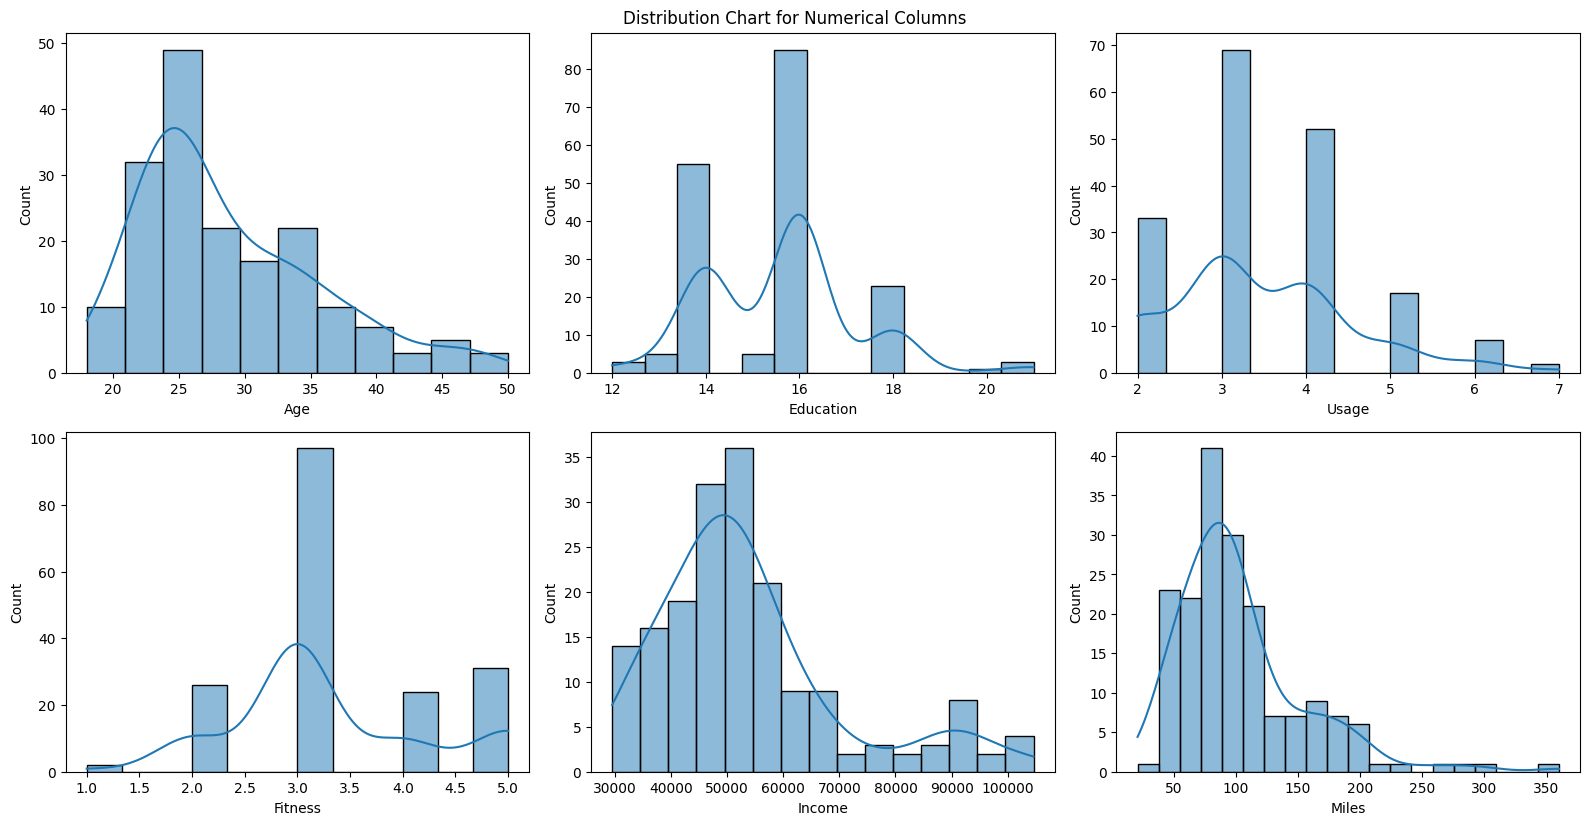

In [22]:
plt.figure(figsize=(16,12))

plt.suptitle('Distribution Chart for Numerical Columns')
plt.subplot(3, 3, 1)
sns.histplot(data=aero_df, x='Age', kde=True)

plt.subplot(3, 3, 2)
sns.histplot(data=aero_df, x='Education', kde=True)

plt.subplot(3, 3, 3)
sns.histplot(data=aero_df, x='Usage', kde=True)

plt.subplot(3, 3, 4)
sns.histplot(data=aero_df, x='Fitness', kde=True)

plt.subplot(3, 3, 5)
sns.histplot(data=aero_df, x='Income', kde=True)

plt.subplot(3, 3, 6)
sns.histplot(data=aero_df, x='Miles', kde=True)

plt.tight_layout()
plt.show()

### findings
##### age, income, usage and miles have right skewed data
##### Majority of Customers fall within the USD 45,000 - USD 60,000 range
##### Only a few of our customers run more than 180 miles per week

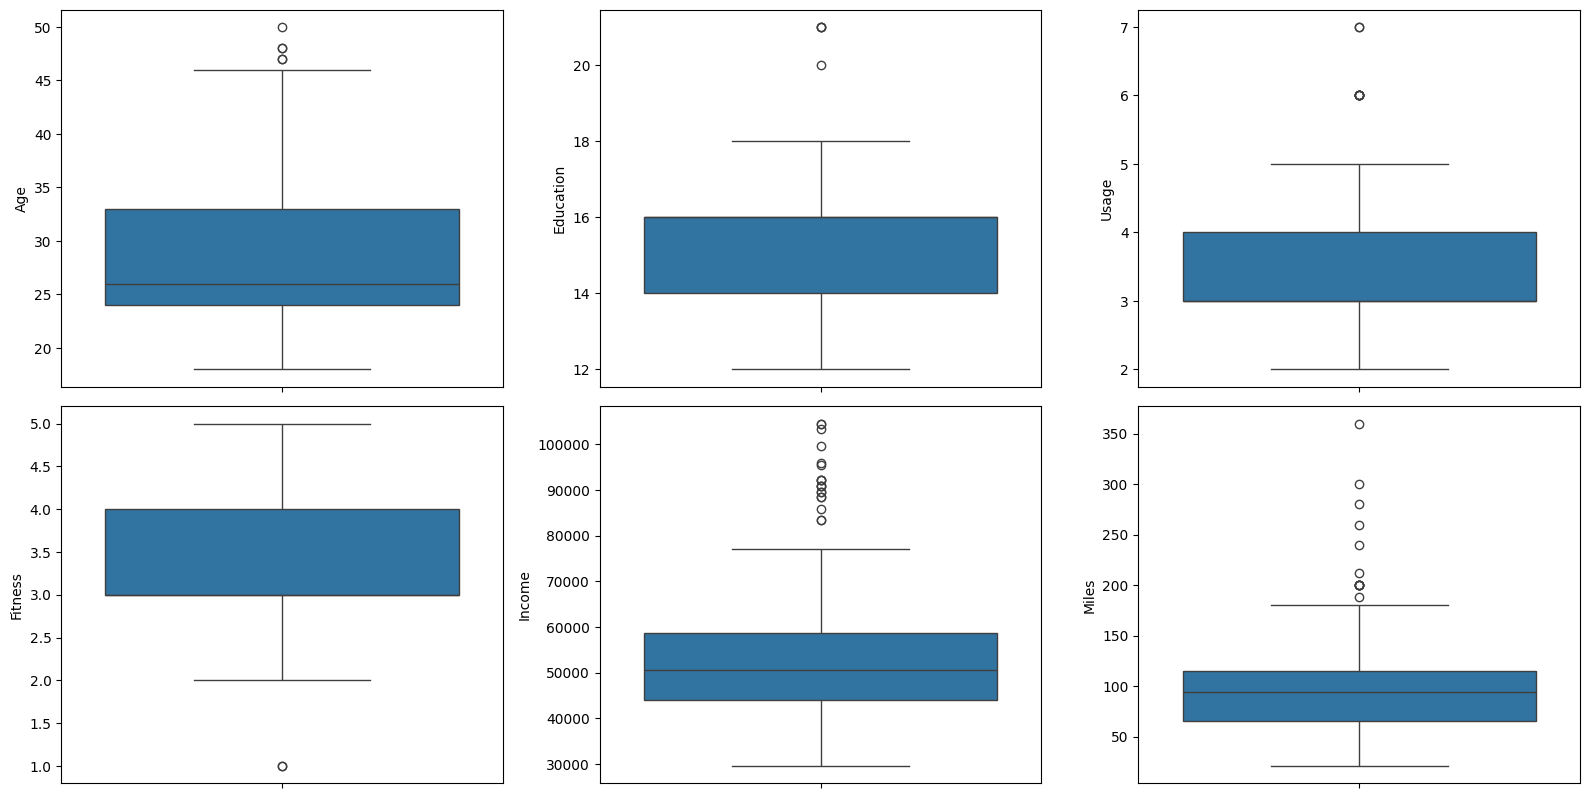

In [23]:
plt.figure(figsize=(16,12))

plt.subplot(3, 3, 1)
sns.boxplot(data=aero_df, y='Age')

plt.subplot(3, 3, 2)
sns.boxplot(data=aero_df, y='Education')

plt.subplot(3, 3, 3)
sns.boxplot(data=aero_df, y='Usage')

plt.subplot(3, 3, 4)
sns.boxplot(data=aero_df, y='Fitness')

plt.subplot(3, 3, 5)
sns.boxplot(data=aero_df, y='Income')

plt.subplot(3, 3, 6)
sns.boxplot(data=aero_df, y='Miles')

plt.tight_layout()
plt.show()

#### findings
##### Both Miles and Income have significant outliers based on the above boxblot.
##### There are outliers over USD 85,000

In [24]:
# we can clearly see that there are many outliers present in the income and miles box plot
# Handling outlier in the income and miles column

df = aero_df.copy()

In [25]:
# outlier treatment for income column
quartile3 = df['Income'].quantile(0.75)
quartile1 = df['Income'].quantile(0.25)
iqr = quartile3 - quartile1
upper_limit = quartile3 + 1.5*iqr
lower_limit = quartile1 - 1.5*iqr
print(iqr, upper_limit, lower_limit)

14609.25 80581.875 22144.875


In [26]:
df_v1 = df[(df['Income'] > lower_limit) & (df['Income'] < upper_limit)]

In [27]:
# outlier treatment for miles column
quartile3 = df['Miles'].quantile(0.75)
quartile1 = df['Miles'].quantile(0.25)
iqr = quartile3 - quartile1
upper_limit = quartile3 + 1.5*iqr
lower_limit = quartile1 - 1.5*iqr
print(iqr, upper_limit, lower_limit)

48.75 187.875 -7.125


In [28]:
df_v1 = df_v1[(df_v1['Miles'] > lower_limit) & (df_v1['Miles'] < upper_limit)]

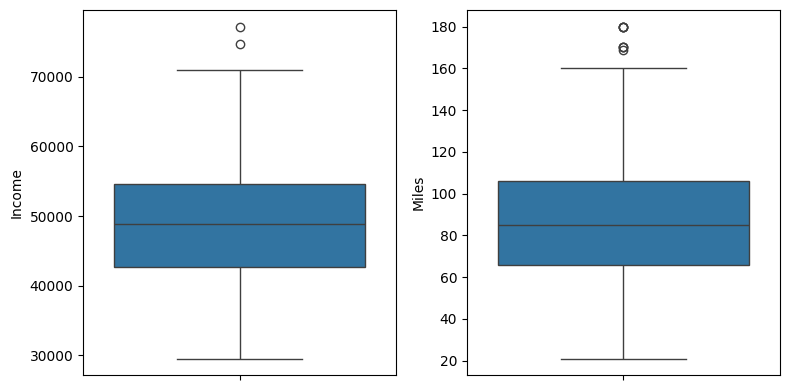

In [29]:
# plotting the income and miles box plot
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data = df_v1, y='Income')

plt.subplot(1, 2, 2)
sns.boxplot(data = df_v1, y='Miles')

plt.tight_layout()
plt.show()

#### findings
##### It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

In [30]:
df_v1.shape

(155, 12)

# Categorical variable - univariate analysis

In [31]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_Group', 'Age_Category',
       'Income_Slab'],
      dtype='object')

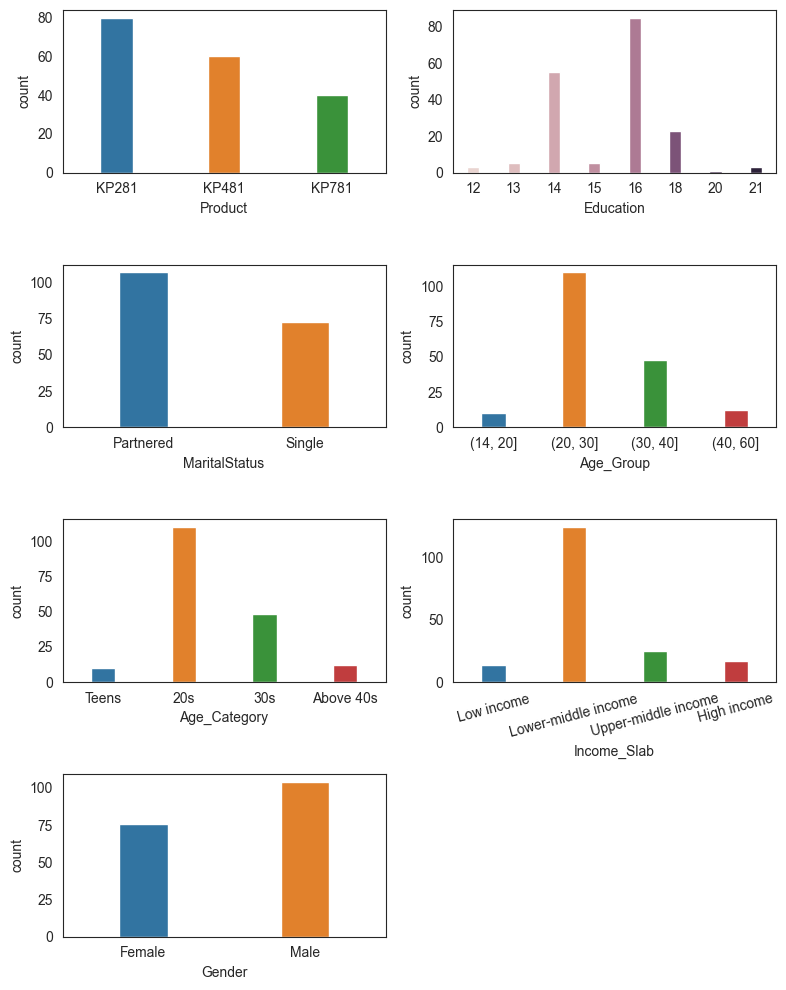

In [59]:
plt.figure(figsize=(8,10))

plt.subplot(4, 2, 1)
sns.countplot(data=df, x='Product', width=0.3, hue='Product', legend=False)

plt.subplot(4, 2, 2)
sns.countplot(data=df, x='Education', width=0.3, hue='Education', legend=False)

plt.subplot(4, 2, 3)
sns.countplot(data=df, x='MaritalStatus', width=0.3, hue='MaritalStatus', legend=False)

plt.subplot(4, 2, 4)
sns.countplot(data=df, x='Age_Group', width=0.3, hue='Age_Group', legend=False)

plt.subplot(4, 2, 5)
sns.countplot(data=df, x='Age_Category', width=0.3, hue='Age_Category', legend=False)

plt.subplot(4, 2, 6)
sns.countplot(data=df, x='Income_Slab', width=0.3, hue='Income_Slab', legend=False)
plt.xticks(rotation=15)

plt.subplot(4, 2, 7)
sns.countplot(data=df, x='Gender', width=0.3, hue='Gender', legend=False)

plt.tight_layout()
plt.show()

#### findings
##### Around 80% of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD 60,000-85000.
##### Around 82% or 83% of treadmills are purchased by customers aged 20 to 40.
##### The treadmills are more likely to be purchased by married people
##### Model KP281 is the best-selling product
##### Customer with fitness level 3 buy major chuck of treadmills.

## Bi-Variate Analysis

In [33]:
# Categorical variables - Product, Gender, MaritalStatus, Age_Category, Age_Group, Income_Slab, Fitness

In [34]:
def cat_bi_va_analysis(dataframe, colname, depend_var, nrows=2, mcols=2, width=20, height=15):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
    sns.set_style('white')
    rows = 0
    string = ' based Distribution'
    for var in colname:
        string = var + string
        sns.countplot(data=dataframe, x=depend_var, hue=var, palette='Set2', ax=ax[rows][0])
        sns.countplot(data=dataframe, x=var, hue=depend_var, palette='husl', ax=ax[rows][1])

        ax[rows][0].set_title(string)
        ax[rows][1].set_title(string)

        ax[rows][0].set_ylabel('Count')
        ax[rows][0].set_xlabel(var)

        ax[rows][1].set_ylabel('Count')
        ax[rows][1].set_xlabel(var)

        rows = rows + 1
        string = " based Distribution"
    plt.legend()
    plt.show()

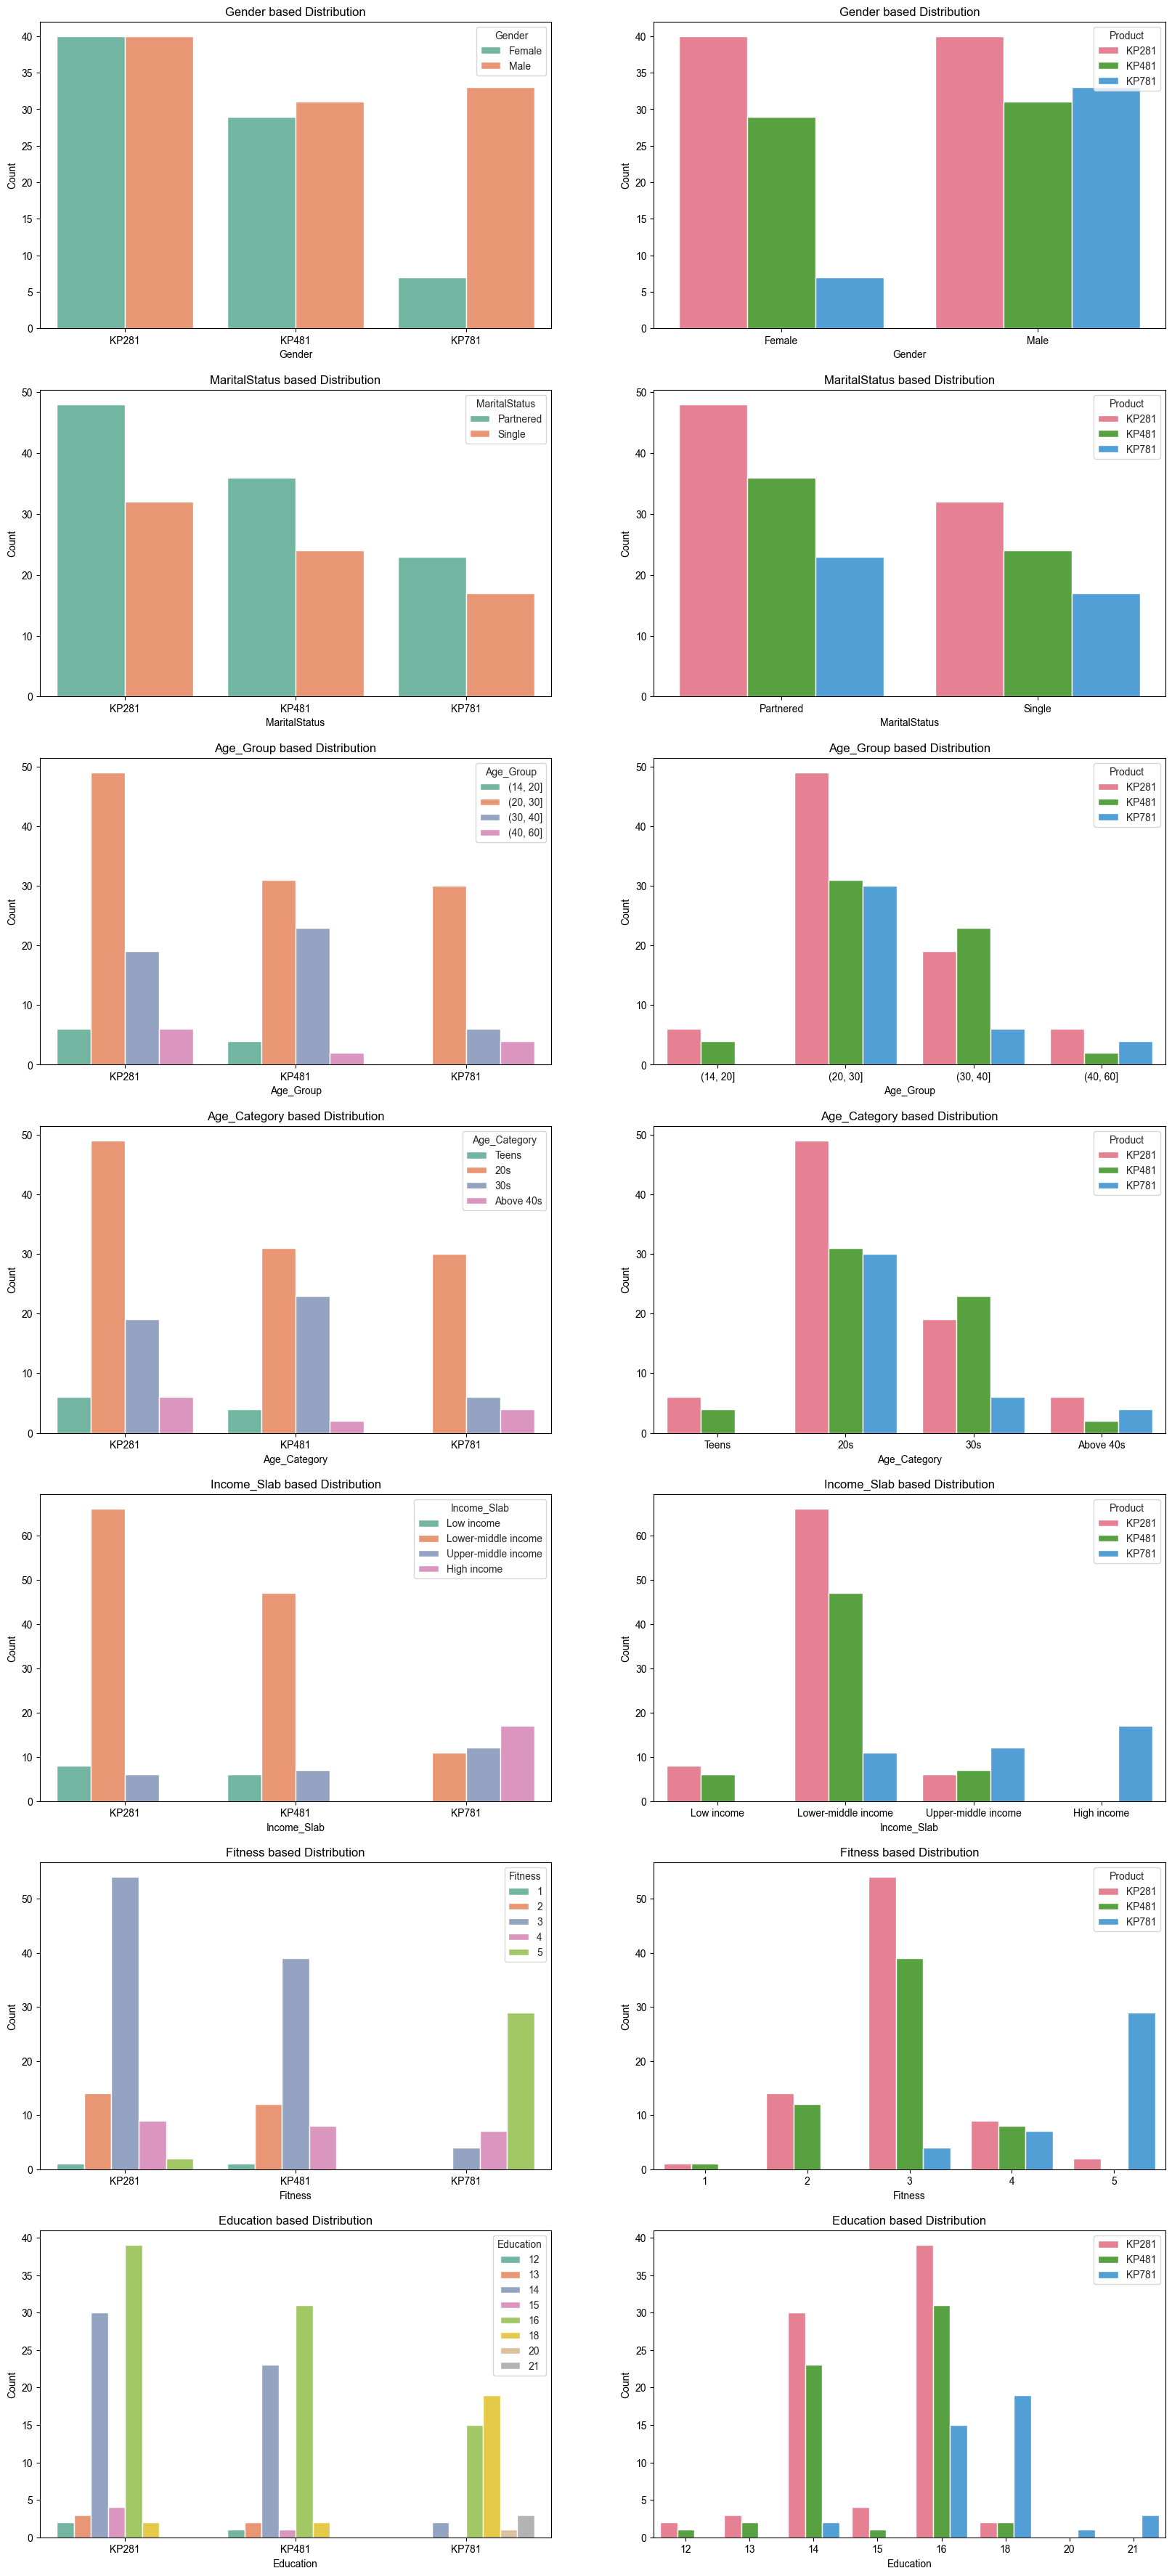

In [35]:
cate_colu = ['Gender', 'MaritalStatus', 'Age_Group', 'Age_Category','Income_Slab','Fitness','Education']
cat_bi_va_analysis(df, cate_colu, 'Product', 7, 2, 20, 45)

#### findings
##### Gender
##### KP781 model is the most popular among males
##### KP281 is equally preferred by men and women

##### AgeCategory
##### The most useful treadmills product for people over 40s is the KP281 & KP781. However, they buy fewer treadmills.

##### Income
##### Customer with high income only buy high end model. (KP781)

##### Fitness Level
##### Customers with 5 fitness level prefer using KP781.(High end Model) With moderate fitness level , customer prefer using KP281.

##### Education
##### Customer above 20 years education, purchase only KP781 model. The other categorical features show no specific trends.

#### Bi-Variate Analysis for Numerical Column

In [66]:
def num_bi_analysis(dataframe, colname, category, groupby, nrows=1, mcols=2, width=20, height=10):
    fig, ax = plt.subplots(nrows, mcols, figsize=(width, height))
    sns.set_style('white')
    fig.set_facecolor('lightgrey')
    rows = 0
    for var in colname:
        sns.boxplot(x=category, y=var, hue=groupby, data=dataframe, ax = ax[rows])

        ax[rows].set_ylabel(var)
        ax[rows].set_xlabel(category)

        rows = rows + 1

    plt.show()

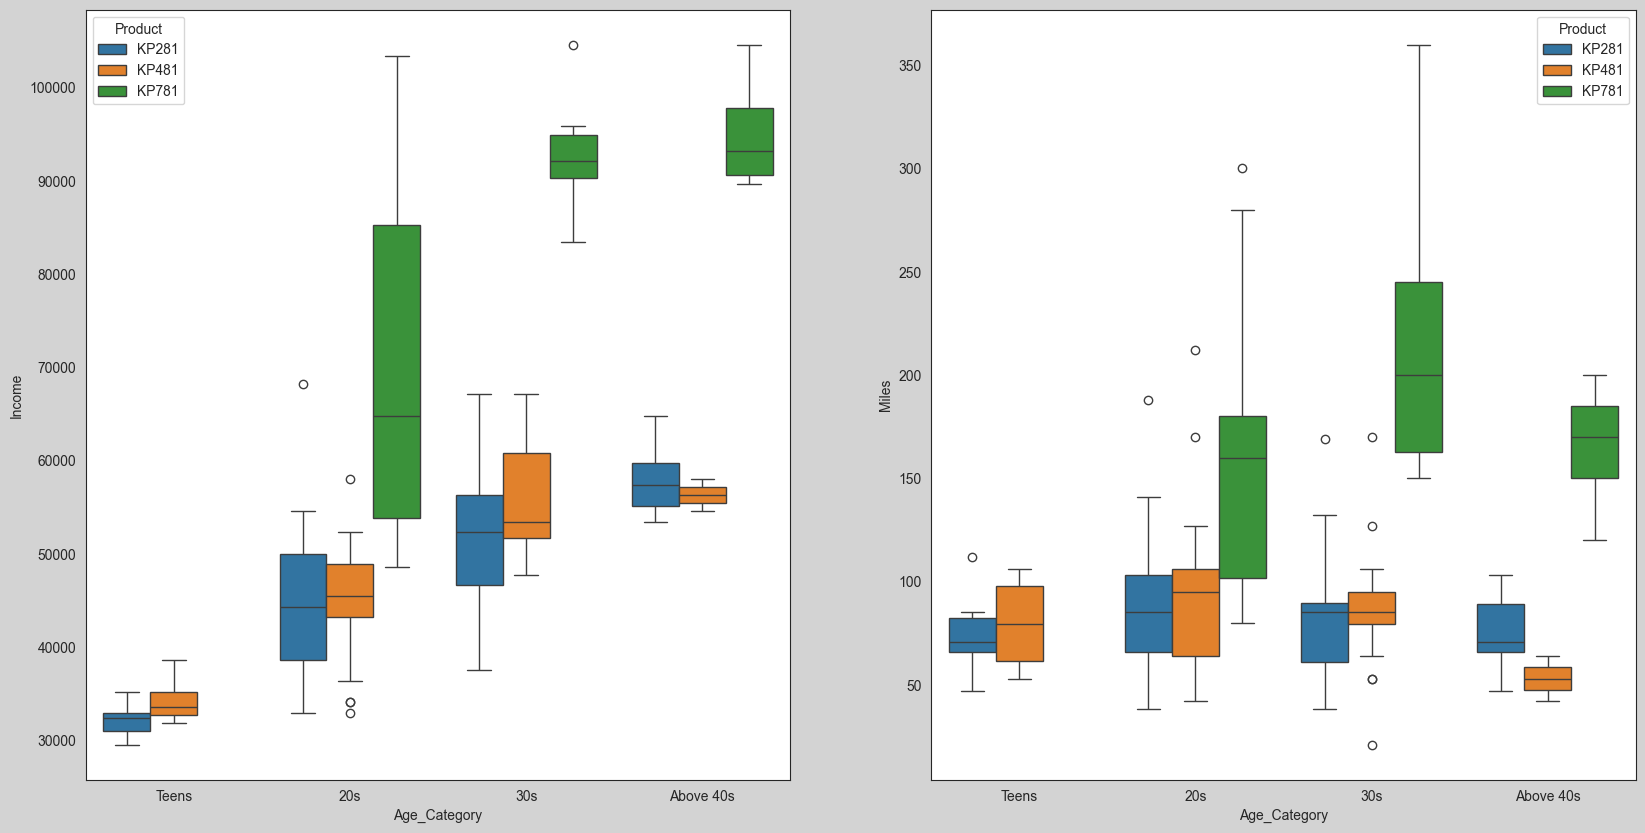

In [67]:
num_col = ['Income', 'Miles']
num_bi_analysis(df, num_col, 'Age_Category', 'Product')

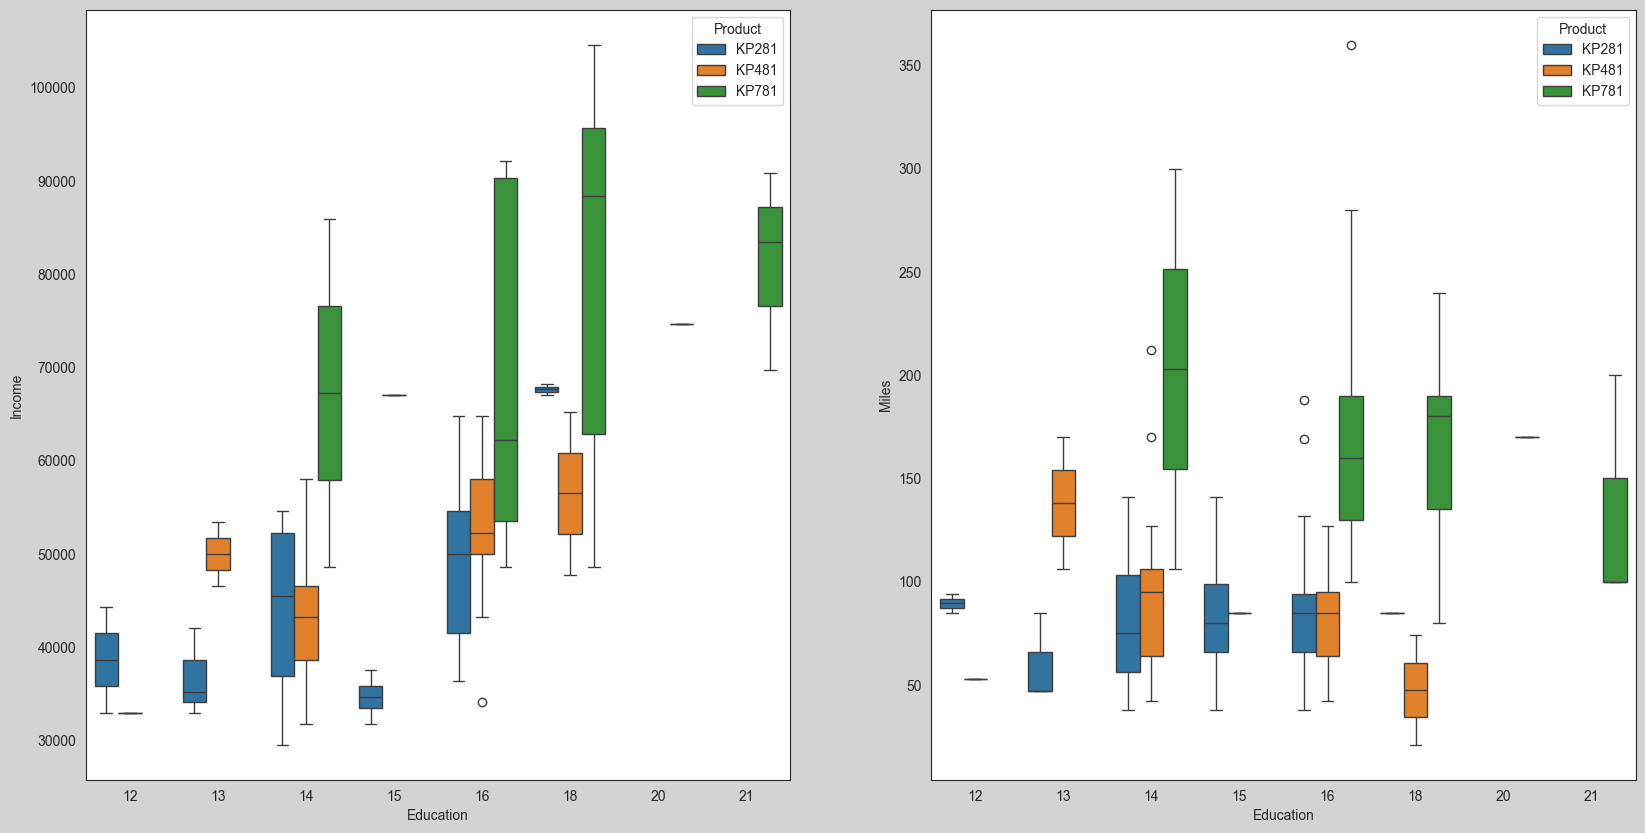

In [68]:
num_col = ['Income', 'Miles']
num_bi_analysis(df, num_col, 'Education', 'Product')

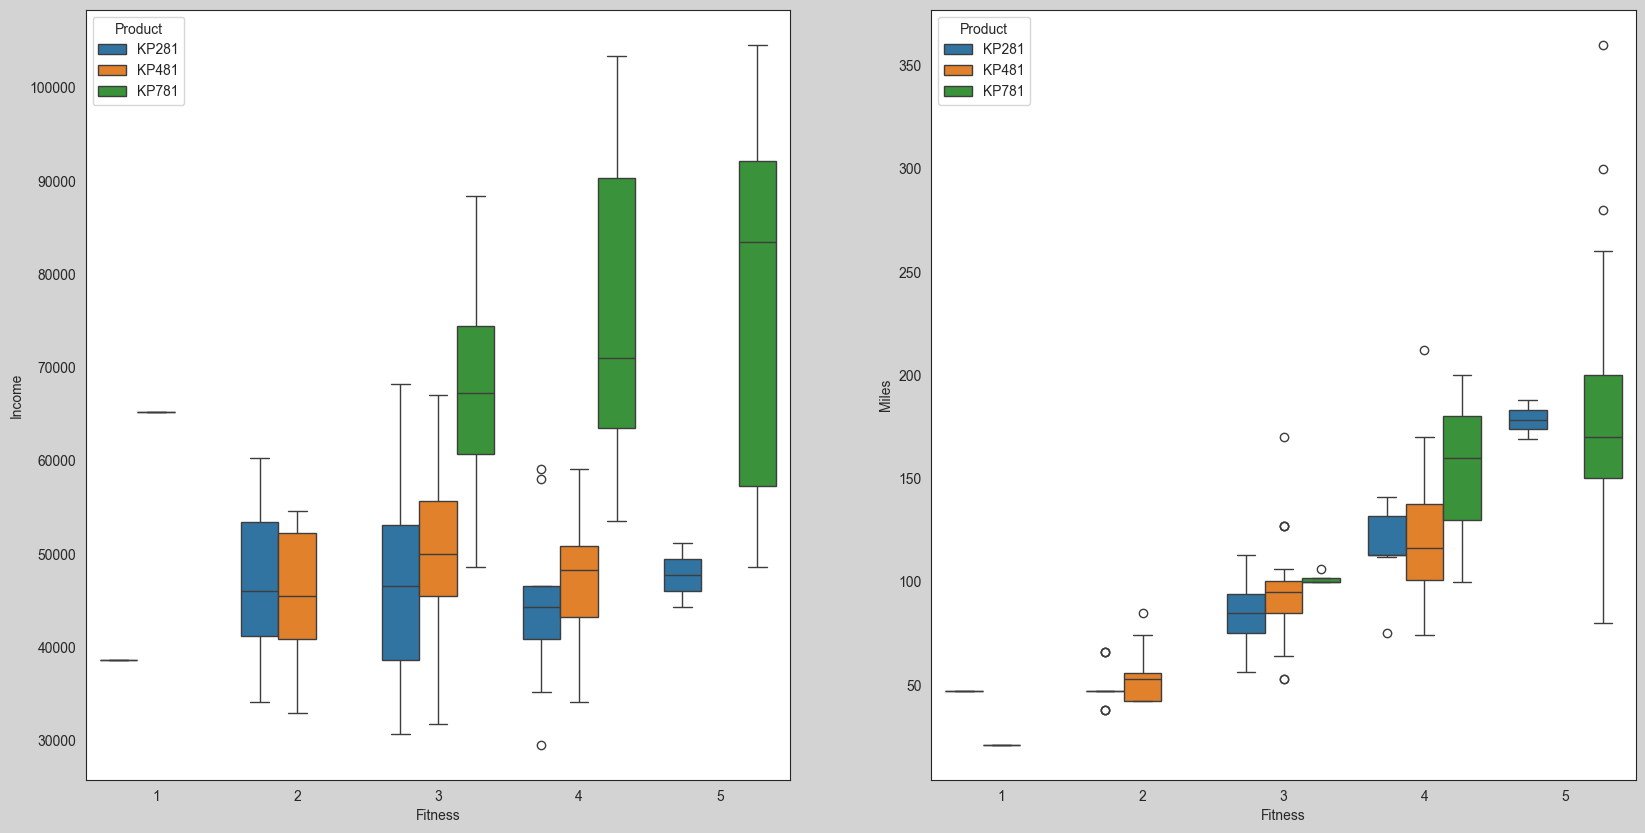

In [69]:
num_col = ['Income', 'Miles']
num_bi_analysis(df, num_col, 'Fitness', 'Product')

In [40]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Age_Group', 'Age_Category',
       'Income_Slab'],
      dtype='object')

In [41]:
cols = ['Miles', 'Income', 'Age', 'Education', 'Usage', 'Fitness']
df[cols].corr()

,Miles,Income,Age,Education,Usage,Fitness
Miles,1.000000,0.543473,0.036618,0.307284,0.759130,0.785702
Income,0.543473,1.000000,0.513414,0.625827,0.519537,0.535005
Age,0.036618,0.513414,1.000000,0.280496,0.015064,0.061105
Education,0.307284,0.625827,0.280496,1.000000,0.395155,0.410581
Usage,0.759130,0.519537,0.015064,0.395155,1.000000,0.668606
Fitness,0.785702,0.535005,0.061105,0.410581,0.668606,1.000000


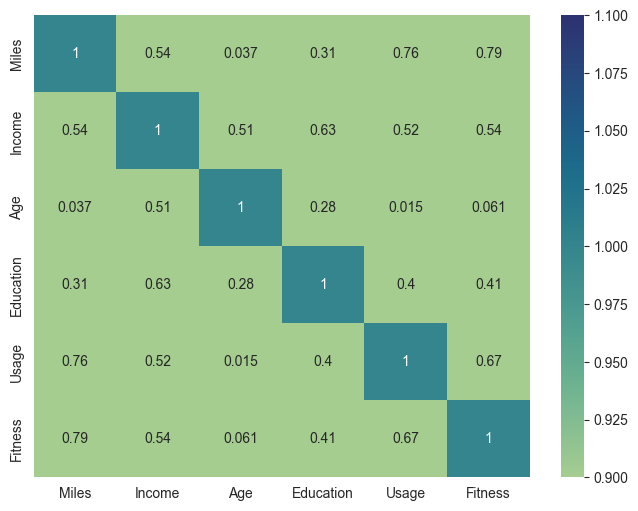

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, vmin=1, cmap='crest')
plt.show()

#### findings

##### Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
##### Income and education show a strong correlation. High-income and highly educated people prefer high-end models (KP781), as mentioned during Bivariant analysis of Categorical variables.
##### There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

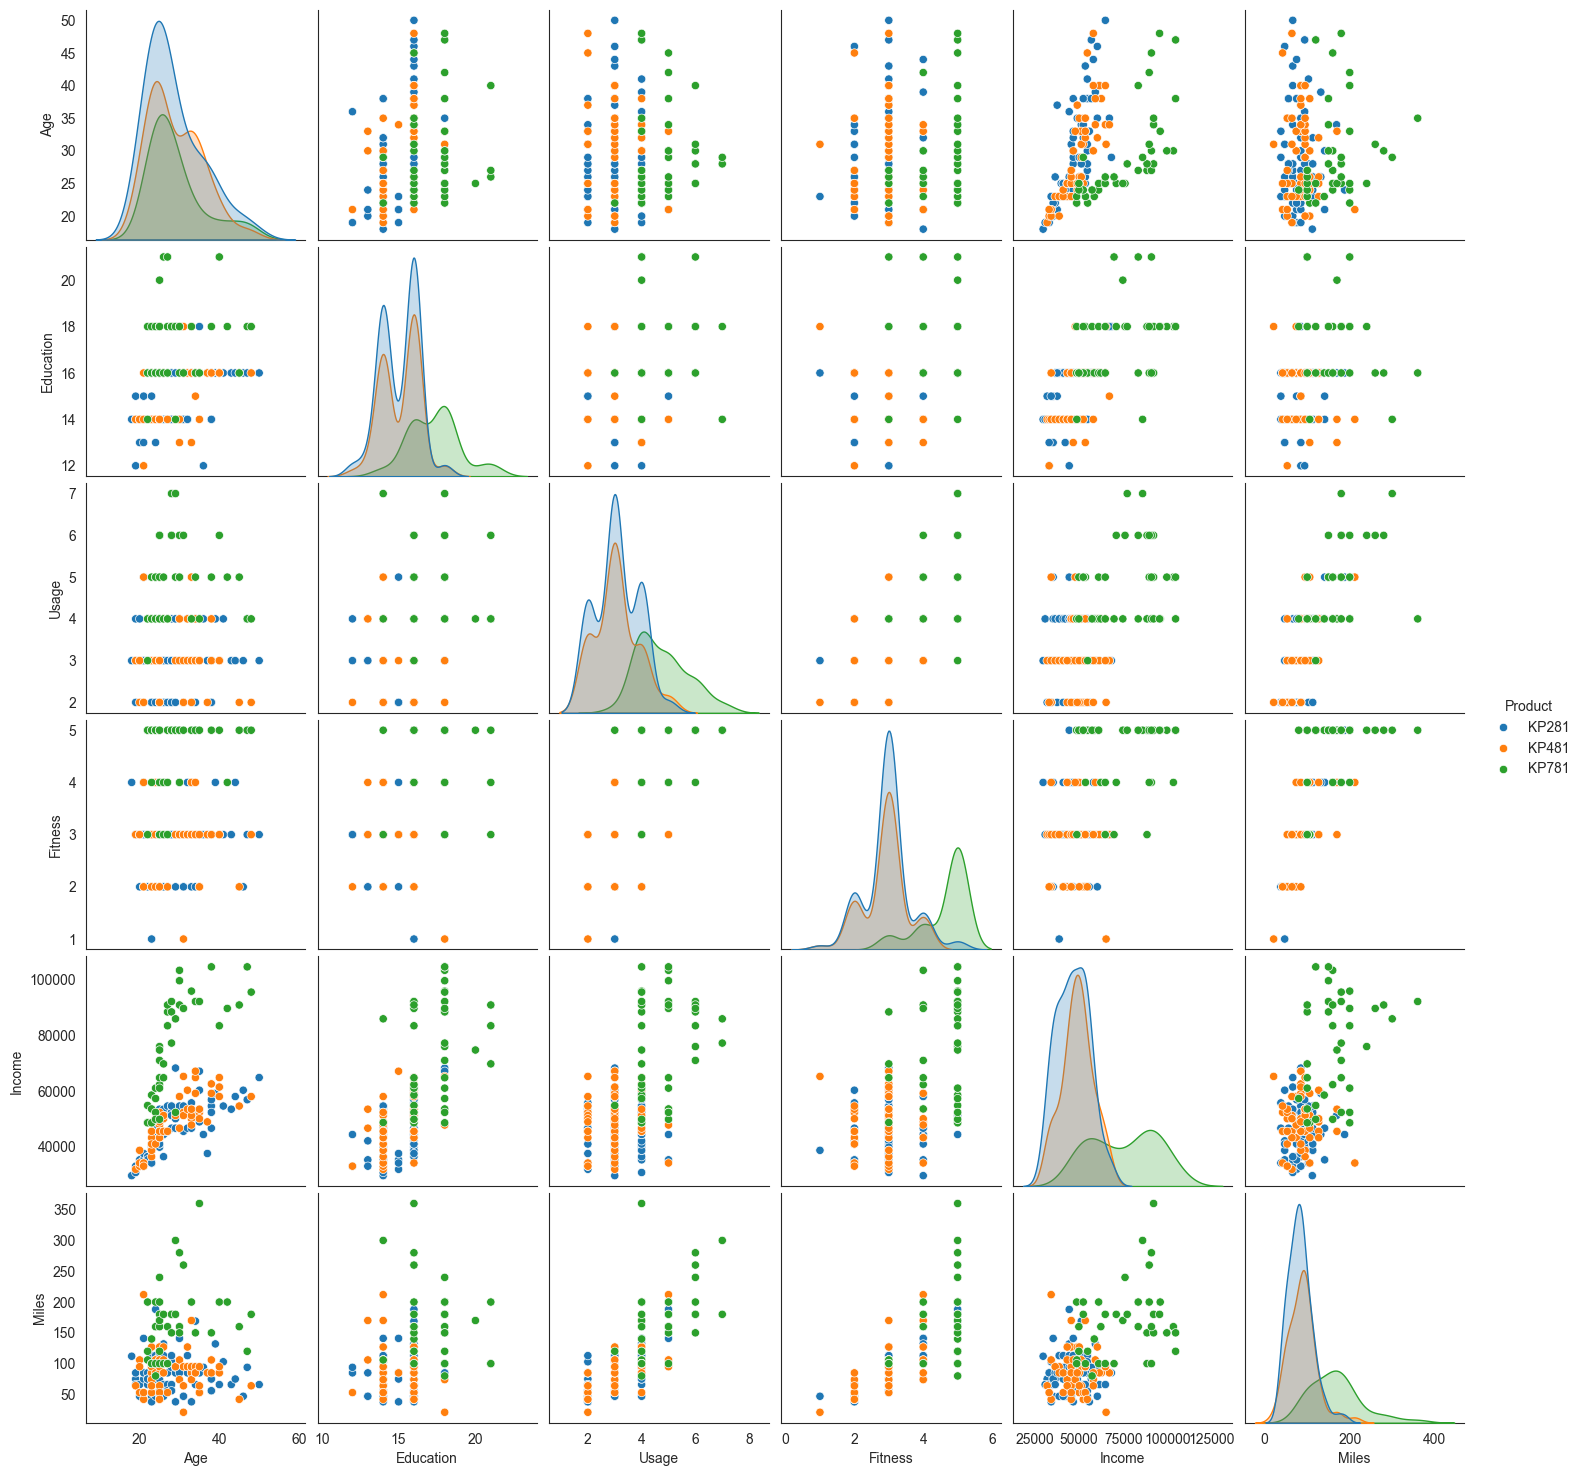

In [43]:
sns.pairplot(df, hue='Product')
plt.show()